In [1]:
from nltk import FreqDist #Importing natural language toolkit (nltk) to create word frequency distribution
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import pprint
import pandas as pd
import matplotlib.pyplot as plt


client_id = "61fc722b270143c39a95b0d83113b103"
client_secret = "a1b6d905ef364a4b9bd662f136c0892f"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# I found top 100 for 2017 csv on kaggle
top_2013 = pd.read_csv('Top_100_2013.csv')

# result = sp.search('Thriller',type='track')
# pprint.pprint(result)

top_2013.head()

,№,Title,Artist(s)
0,1,"""Thrift Shop""",Macklemore & Ryan Lewis featuring Wanz
1,2,"""Blurred Lines""",Robin Thicke featuring T.I. and Pharrell Williams
2,3,"""Radioactive""",Imagine Dragons
3,4,"""Harlem Shake""",Baauer
4,5,"""Can't Hold Us""",Macklemore & Ryan Lewis featuring Ray Dalton


In [ ]:
songs = []
genres = []
for song in range(0,100):
    
    #I put this in a try just in case the search result yields an error..or any api request yields an error
    try:
        # I search the song name and artist using spotipy, then I limit the number of search results to 1
         track = sp.search(top_2013['Title'][song] + ' ' + top_2013['Artist(s)'][song],limit=1)
            
            # Here I am parsing the json return to get the artists' id so I can look up the artist
         track_id = track['tracks']['items'][0]['artists'][0]['id']
        # This gets the artists' spotify profile, which includes the genres reflected in their music
         artist = sp.artist(track_id)
         genres.append(artist['genres'])
    except:
        genres.append('n/a')   

In [3]:
top_2013['genre'] = genres
top_2013

,№,Title,Artist(s),genre
0,1,"""Thrift Shop""",Macklemore & Ryan Lewis featuring Wanz,n/a
1,2,"""Blurred Lines""",Robin Thicke featuring T.I. and Pharrell Williams,n/a
2,3,"""Radioactive""",Imagine Dragons,"[modern rock, rock, vegas indie]"
3,4,"""Harlem Shake""",Baauer,"[bass trap, brostep, edm, electro house, elect..."
4,5,"""Can't Hold Us""",Macklemore & Ryan Lewis featuring Ray Dalton,n/a
5,6,"""Mirrors""",Justin Timberlake,"[dance pop, pop]"
6,7,"""Just Give Me a Reason""",Pink featuring Nate Ruess,n/a
7,8,"""When I Was Your Man""",Bruno Mars,"[pop, post-teen pop]"
8,9,"""Cruise""",Florida Georgia Line featuring Nelly,n/a
9,10,"""Roar""",Katy Perry,"[dance pop, pop, post-teen pop]"


In [4]:
allGenres = []
for gen in top_2013['genre']:
    if gen != 'n/a':
        for b in gen:
            allGenres.append(b)
len(allGenres)


274

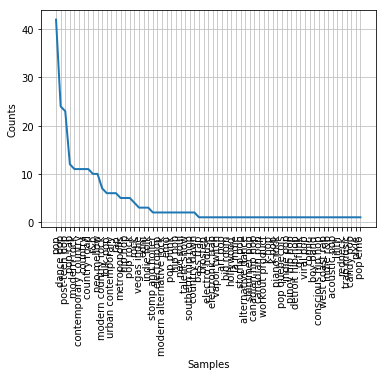

In [5]:
#I use FreqDist to automatically count the number of times a certain word, in this case genre, appears in the list
genreDist = FreqDist(allGenres)

#This is a plot of the frequency distribution. I believe there is much work to be done in terms of visualization
# but I believe this is a start
# genreDist
genreDist.plot()

In [20]:
df = pd.DataFrame.from_dict(genreDist, orient='index')

genres = df.rename_axis('Genres').reset_index()\
 .assign(length = df.index.str.len()).rename(columns={0:'Genre Count'})

del genres["length"]
genres


# sort the values by largest to smallest
genres.sort_values(by="Genre Count", ascending=False)
genres.set_index("Genres")


,Genre Count
Genres,
modern rock,11
rock,4
vegas indie,3
bass trap,1
brostep,1
edm,3
electro house,1
electronic trap,1
vapor twitch,1


In [36]:
df = pd.DataFrame.from_dict(genreDist, orient='index')
genre_count = df.rename_axis('Genres').reset_index().rename(columns={0:'Count'})

In [37]:

genre_count = genre_count.sort_values(by="Count", ascending=False)
genre_count.head()

,Genres,Count
10,pop,42
9,dance pop,24
11,post-teen pop,23
30,pop rap,12
41,country road,11


In [22]:
popCount = 0
rapCount = 0
edmCount = 0
misCount = 0
for genre in allGenres:
   if 'pop' in genre:
       popCount = popCount + 1
   elif('rap' or 'hip hop' or 'trap') in genre:
       rapCount = rapCount + 1
   elif('edm' or 'electro' or 'techno') in genre:
       edmCount = edmCount + 1
   else:
       misCount = misCount + 1

condensedGenre = ['Pop','Rap/Hip-Hop','EDM','Misc.']
summarizedGenres = pd.DataFrame({"Genre":condensedGenre, "Count":[popCount,rapCount,edmCount,misCount]})

summarizedGenres = summarizedGenres.set_index("Genre")
summarizedGenres

,Count
Genre,
Pop,134
Rap/Hip-Hop,10
EDM,3
Misc.,127


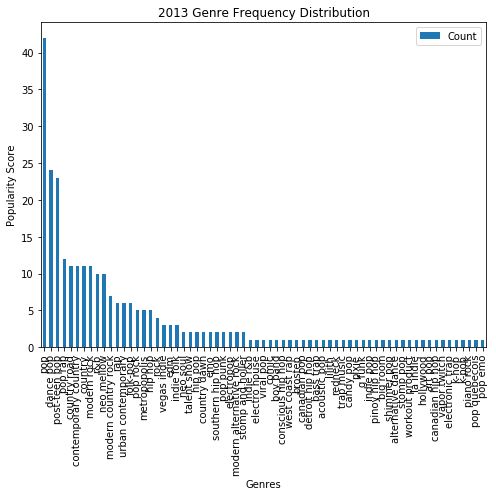

In [38]:
genre_count = genre_count.set_index('Genres')
genre_count.plot(kind='bar', figsize=(7,7), )

genre_count = genre_count.reset_index()
plt.title('2013 Genre Frequency Distribution')
plt.xlabel('Genres')
plt.ylabel('Popularity Score')
plt.tight_layout()
plt.savefig("freqDist2013.png")

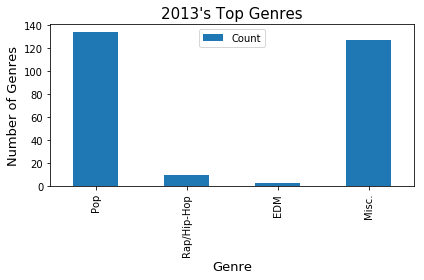

In [23]:
summarizedGenres.plot(kind='bar')
plt.xlabel("Genre", fontsize=13)
plt.ylabel("Number of Genres", fontsize=13)
plt.title("2013's Top Genres", fontsize=15)
plt.tight_layout()
plt.savefig("2013's Top Genres.png")

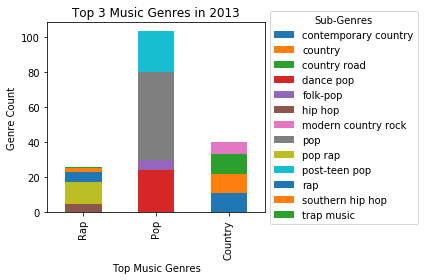

In [34]:
sum = [['Pop','pop', 50],
        ['Pop','dance pop', 24],
        ['Pop','post-teen pop', 23],
        ['Pop','folk-pop', 6],
        ['Pop','pop', 42],
        ['Rap','rap', 6],
        ['Rap','pop rap', 12],
        ['Rap','hip hop', 5],
        ['Rap','trap music', 1],
        ['Rap','southern hip hop', 2],
        ['Country','country road', 11],
        ['Country','modern country rock', 7],
        ['Country','contemporary country', 11],
        ['Country','country', 11]]
         
data = pd.DataFrame(sum,
        columns=['Top Music Genres', 'Sub-Genres', 'value'])         
data = data.drop_duplicates(['Top Music Genres', 'Sub-Genres'])
data = data.set_index(['Top Music Genres', 'Sub-Genres']).value
data.unstack().sort_index(ascending=False).plot(kind='bar', stacked=True)
plt.title("Top 3 Music Genres in 2013")
plt.legend(title="Sub-Genres",loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.ylabel("Genre Count")
# data.sort_index(ascending=False)
plt.tight_layout()
plt.savefig("stackedbar2013.png")